После парсинга - создание базы данных из полученного файла. Для этого сначала пришлось получить данные из кодировки, а потом перезаписать их в эксель-файл

In [ ]:
import pandas as pd
import numpy as np
import re

VKdf = pd.read_excel('database_excel.xlsx', sheet_name='Лист1')
VKdf

,date,text,comments,likes,reposts,views,attach_count,attach_types
0,2021-08-19 12:36:02,"Нет, это не шутка! Попробовать 34 курса и инте...",59.0,320.0,596.0,38519.0,10.0,photo
1,2021-08-31 15:26:39,"Не можете определиться, что страшнее: конец ле...",0.0,0.0,1.0,190.0,10.0,photo
2,2021-08-31 14:09:03,"Развить можно любой навык, в том числе и навык...",3.0,9.0,2.0,3458.0,1.0,photo
3,2021-08-30 13:33:47,NaN,0.0,9.0,3.0,9046.0,0.0,NoAttach
4,2021-08-30 11:31:18,Что это у нас такое? Расписание отменных интен...,0.0,19.0,17.0,10117.0,2.0,photo
...,...,...,...,...,...,...,...,...
2095,2018-12-29 15:30:02,Около 3 млрд. устройств работают на Java. Не х...,11.0,85.0,8.0,13667.0,1.0,video
2096,2018-12-29 11:03:58,"Рассказываем, как прошел образовательный мараф...",0.0,16.0,1.0,8721.0,1.0,link
2097,2018-12-29 10:30:01,Заканчиваем декабрь нашей еженедельной подборк...,3.0,34.0,1.0,13129.0,1.0,link
2098,2018-12-28 15:30:01,Встречайте последний выпуск рубрики «Шрифт нед...,5.0,41.0,3.0,11157.0,1.0,photo


In [ ]:
VKdf['only_date'] = VKdf['date'].dt.strftime('%Y-%m')
VKdf['only_time'] = VKdf['date'].dt.strftime('%H')
VKdf['weekday'] = VKdf['date'].dt.dayofweek

In [ ]:
VKdf

,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday
0,2021-08-19 12:36:02,"Нет, это не шутка! Попробовать 34 курса и инте...",59.0,320.0,596.0,38519.0,10.0,photo,2021-08,12,3
1,2021-08-31 15:26:39,"Не можете определиться, что страшнее: конец ле...",0.0,0.0,1.0,190.0,10.0,photo,2021-08,15,1
2,2021-08-31 14:09:03,"Развить можно любой навык, в том числе и навык...",3.0,9.0,2.0,3458.0,1.0,photo,2021-08,14,1
3,2021-08-30 13:33:47,NaN,0.0,9.0,3.0,9046.0,0.0,NoAttach,2021-08,13,0
4,2021-08-30 11:31:18,Что это у нас такое? Расписание отменных интен...,0.0,19.0,17.0,10117.0,2.0,photo,2021-08,11,0
...,...,...,...,...,...,...,...,...,...,...,...
2095,2018-12-29 15:30:02,Около 3 млрд. устройств работают на Java. Не х...,11.0,85.0,8.0,13667.0,1.0,video,2018-12,15,5
2096,2018-12-29 11:03:58,"Рассказываем, как прошел образовательный мараф...",0.0,16.0,1.0,8721.0,1.0,link,2018-12,11,5
2097,2018-12-29 10:30:01,Заканчиваем декабрь нашей еженедельной подборк...,3.0,34.0,1.0,13129.0,1.0,link,2018-12,10,5
2098,2018-12-28 15:30:01,Встречайте последний выпуск рубрики «Шрифт нед...,5.0,41.0,3.0,11157.0,1.0,photo,2018-12,15,4


In [ ]:
months = pd.date_range('2020-08-19', '2021-08-19', freq='1M', normalize=True)
months_to_analyse = [d.strftime('%Y-%m') for d in months]

In [ ]:
vk2021 = VKdf.loc[VKdf['only_date'].isin(months_to_analyse)]
vk2021.dropna(inplace=True)
vk2021

<ipython-input-5-5cb4288b4887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vk2021.dropna(inplace=True)


,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday
65,2021-07-31 18:00:03,"Linux — мощная ОС, которая не уступает Windows...",19.0,22.0,10.0,17531.0,1.0,link,2021-07,18,5
66,2021-07-31 11:00:31,Чему только не учат в Скиллбогвартсе: и рисова...,2.0,42.0,23.0,19676.0,6.0,photo,2021-07,11,5
67,2021-07-30 18:00:06,Наверняка каждый хотел хоть раз все бросить и ...,1.0,93.0,91.0,13674.0,1.0,link,2021-07,18,4
68,2021-07-30 17:00:22,На поиски себя и работы по душе можно потратит...,17.0,37.0,59.0,17570.0,1.0,photo,2021-07,17,4
70,2021-07-30 14:19:25,Обычно благодаря резюме можно получить только ...,4.0,19.0,18.0,14760.0,1.0,photo,2021-07,14,4
...,...,...,...,...,...,...,...,...,...,...,...
724,2020-08-03 18:00:55,Skillbox и РАНХиГС запускают первый онлайн-бак...,6.0,88.0,3.0,19483.0,6.0,photo,2020-08,18,0
725,2020-08-03 14:45:19,"Ну что, друзья, готовы к нашим интенсивам? Над...",15.0,67.0,2.0,21864.0,1.0,photo,2020-08,14,0
726,2020-08-03 13:19:19,У ведущих новостей появился серьезный конкурен...,42.0,67.0,4.0,20116.0,1.0,video,2020-08,13,0
727,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08,19,6


In [ ]:
vk2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 65 to 728
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          661 non-null    datetime64[ns]
 1   text          661 non-null    object        
 2   comments      661 non-null    float64       
 3   likes         661 non-null    float64       
 4   reposts       661 non-null    float64       
 5   views         661 non-null    float64       
 6   attach_count  661 non-null    float64       
 7   attach_types  661 non-null    object        
 8   only_date     661 non-null    object        
 9   only_time     661 non-null    object        
 10  weekday       661 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 62.0+ KB


А теперь напишем функцию, которая в список выводит рубрики и применим ее построчно, создавая новую колонку
<br> вот так: cool_dict = lessons_more_month.apply(lambda row1 : tryings(row1['start_date'], row1['finish_date'], row1['title']), axis=1) 
<br> и потом эту колонку explode 
<br> еще можно посчитать количество слов и тоже в отдельную колонку 

In [ ]:
def find_topic(text): 
    regular = r'#\S+'
    compiled = re.compile(regular)
    try: 
        lst_topics = compiled.findall(text)
    except BaseException: 
        lst_topics = ['No topic']
    return lst_topics
vk2021['topics'] = vk2021.apply(lambda row : find_topic(row['text']), axis=1)

vk2021

<ipython-input-7-2fbe38f644e4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vk2021['topics'] = vk2021.apply(lambda row : find_topic(row['text']), axis=1)


,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday,topics
65,2021-07-31 18:00:03,"Linux — мощная ОС, которая не уступает Windows...",19.0,22.0,10.0,17531.0,1.0,link,2021-07,18,5,[]
66,2021-07-31 11:00:31,Чему только не учат в Скиллбогвартсе: и рисова...,2.0,42.0,23.0,19676.0,6.0,photo,2021-07,11,5,[]
67,2021-07-30 18:00:06,Наверняка каждый хотел хоть раз все бросить и ...,1.0,93.0,91.0,13674.0,1.0,link,2021-07,18,4,[]
68,2021-07-30 17:00:22,На поиски себя и работы по душе можно потратит...,17.0,37.0,59.0,17570.0,1.0,photo,2021-07,17,4,[]
70,2021-07-30 14:19:25,Обычно благодаря резюме можно получить только ...,4.0,19.0,18.0,14760.0,1.0,photo,2021-07,14,4,[#Skillbox_работа]
...,...,...,...,...,...,...,...,...,...,...,...,...
724,2020-08-03 18:00:55,Skillbox и РАНХиГС запускают первый онлайн-бак...,6.0,88.0,3.0,19483.0,6.0,photo,2020-08,18,0,[#Skillbox_РАНХиГС]
725,2020-08-03 14:45:19,"Ну что, друзья, готовы к нашим интенсивам? Над...",15.0,67.0,2.0,21864.0,1.0,photo,2020-08,14,0,[#Расписание_Skillbox]
726,2020-08-03 13:19:19,У ведущих новостей появился серьезный конкурен...,42.0,67.0,4.0,20116.0,1.0,video,2020-08,13,0,"[#Skillbox_программирование, #В_закладки_Skill..."
727,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08,19,6,"[#Моушн_Skillbox, #Skillbox_дизайн]"


In [ ]:
def word_count(textik): 
    lst = textik.split()
    return len(lst)
vk2021['text_length'] = vk2021.apply(lambda row : word_count(row['text']), axis=1)
vk2021['count'] = 1

<ipython-input-8-1edfa8bd26a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vk2021['text_length'] = vk2021.apply(lambda row : word_count(row['text']), axis=1)
<ipython-input-8-1edfa8bd26a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vk2021['count'] = 1


In [ ]:
vk2021_exploded = vk2021.explode('topics')
vk2021_exploded

,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday,topics,text_length,count
65,2021-07-31 18:00:03,"Linux — мощная ОС, которая не уступает Windows...",19.0,22.0,10.0,17531.0,1.0,link,2021-07,18,5,NaN,28,1
66,2021-07-31 11:00:31,Чему только не учат в Скиллбогвартсе: и рисова...,2.0,42.0,23.0,19676.0,6.0,photo,2021-07,11,5,NaN,83,1
67,2021-07-30 18:00:06,Наверняка каждый хотел хоть раз все бросить и ...,1.0,93.0,91.0,13674.0,1.0,link,2021-07,18,4,NaN,47,1
68,2021-07-30 17:00:22,На поиски себя и работы по душе можно потратит...,17.0,37.0,59.0,17570.0,1.0,photo,2021-07,17,4,NaN,99,1
70,2021-07-30 14:19:25,Обычно благодаря резюме можно получить только ...,4.0,19.0,18.0,14760.0,1.0,photo,2021-07,14,4,#Skillbox_работа,86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2020-08-03 13:19:19,У ведущих новостей появился серьезный конкурен...,42.0,67.0,4.0,20116.0,1.0,video,2020-08,13,0,#В_закладки_Skillbox,57,1
727,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08,19,6,#Моушн_Skillbox,36,1
727,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08,19,6,#Skillbox_дизайн,36,1
728,2020-08-01 11:00:47,«В этой жизни я жалею лишь об одном — что джин...,3.0,140.0,6.0,23570.0,6.0,photo,2020-08,11,5,#Skillbox_дизайн,78,1


Теперь есть два датафрейма
* vk2021 использовать для анализа зависимости даты публикации, других закономерностей кроме рубрики 
* vk2021_exploded использовать для анализа рубрик 
<br><br> может еще посмотреть количество слов, плюс можно спарсить еще что-то? например, количество картинок в посте или прикрепено ли к нему видео? 
<br> UPDATE в код для парсинга были добавлены значения из JSON, чтобы спарсить количество вложений. Но обновленный код пока остался на другом компьютере, сейчас доступа к нему нет.

In [ ]:
vk2021.to_csv("vk2021.csv", sep=';')
vk2021_exploded.to_csv("vk2021_exploded.csv", sep=';')

сделала новые таблицы в файлах, чтобы не проходить код снова сверху и сразу тут открывать

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
vkdf = pd.read_excel('vk2021.xlsx')
vkexp_df = pd.read_excel('vk2021_exploded.xlsx')
vkdf.drop(labels='Column1', axis=1, inplace=True)
vkexp_df.drop(labels='Column1', axis=1, inplace=True)

Теперь делаю функцию, чтобы все длины текста можно было сгруппировать по длине в интервалах 50 слов. Это просто удобнее. 

In [ ]:
def text_group_by_count(textt):
    if textt < 50:
        return 50
    elif textt >= 50 and textt < 100:
        return 100 
    elif textt >= 100 and textt < 150:
        return 150 
    elif textt >= 150 and textt < 200:
        return 200 
    elif textt >= 200 and textt < 250:
        return 250 
    else:
        return 300 
    
vkdf['text_length'] = vkdf.apply(lambda row : text_group_by_count(row['text_length']), axis=1)

In [ ]:
vkdf.head()

,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday,topics,text_length,count
0,2021-07-31 18:00:03,"Linux — мощная ОС, которая не уступает Windows...",19.0,22.0,10.0,17531.0,1.0,link,2021-07-01,18,5,[],50,1
1,2021-07-31 11:00:31,Чему только не учат в Скиллбогвартсе: и рисова...,2.0,42.0,23.0,19676.0,6.0,photo,2021-07-01,11,5,[],100,1
2,2021-07-30 18:00:06,Наверняка каждый хотел хоть раз все бросить и ...,1.0,93.0,91.0,13674.0,1.0,link,2021-07-01,18,4,[],50,1
3,2021-07-30 17:00:22,На поиски себя и работы по душе можно потратит...,17.0,37.0,59.0,17570.0,1.0,photo,2021-07-01,17,4,[],100,1
4,2021-07-30 14:19:25,Обычно благодаря резюме можно получить только ...,4.0,19.0,18.0,14760.0,1.0,photo,2021-07-01,14,4,['#Skillbox_работа'],100,1


In [ ]:
vkdf.describe()

,comments,likes,reposts,views,attach_count,only_time,weekday,text_length,count
count,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.000000,661.0
mean,8.847201,79.167927,30.220877,25123.512859,3.406959,15.555219,2.476551,87.443268,1.0
std,14.912552,77.718747,45.626842,10099.712348,3.094357,2.858065,1.900114,44.987862,0.0
min,0.000000,14.000000,0.000000,11892.000000,0.000000,9.000000,0.000000,50.000000,1.0
25%,0.000000,33.000000,6.000000,19596.000000,1.000000,13.000000,1.000000,50.000000,1.0
50%,4.000000,53.000000,15.000000,22816.000000,1.000000,16.000000,2.000000,100.000000,1.0
75%,12.000000,94.000000,33.000000,27745.000000,6.000000,18.000000,4.000000,100.000000,1.0
max,195.000000,652.000000,369.000000,125192.000000,10.000000,21.000000,6.000000,300.000000,1.0


In [ ]:
#смотрим зависимость популярности постов от времени
time_grouped = vkdf.groupby('only_time').agg('sum').reset_index()
time_grouped

,only_time,comments,likes,reposts,views,attach_count,weekday,text_length,count
0,9,17.0,77.0,29.0,25092.0,8.0,6,100,1
1,10,99.0,857.0,511.0,222041.0,56.0,36,1050,9
2,11,497.0,6941.0,2672.0,1460825.0,252.0,173,4650,54
3,12,471.0,4986.0,2192.0,1610467.0,271.0,182,4800,58
4,13,933.0,6356.0,2014.0,1900935.0,324.0,213,6650,74
5,14,662.0,6204.0,1689.0,1723874.0,257.0,172,6250,64
6,15,458.0,5003.0,2094.0,1628854.0,262.0,147,6400,62
7,16,369.0,3413.0,1411.0,1242849.0,190.0,129,5500,52
8,17,463.0,4424.0,1847.0,1452485.0,186.0,116,4500,54
9,18,683.0,7062.0,2794.0,2603561.0,242.0,245,8950,115


<br> кажется, в 18.00 и 19.00, а также в 13.00 - пиковая активность по публикации постов, после этого часа публикуется в среднем в 2 раза больше постов, чем в другие часы. Это час пик и обед, люди зависают в социальных сетях. Я думаю, стоит убрать эти часы из дальнейшего анализа и проанализировать их отдельно. Также уберу часы 9.00, 10.00 и 21.00 - тут минимальная активность публикаций. 
<br> <br> а теперь еще посмотрю ту же группировку по дням недели

In [ ]:
day_grouped = vkdf.groupby('weekday').agg('median').reset_index()
day_grouped

,weekday,comments,likes,reposts,views,attach_count,only_time,text_length,count
0,0,4.0,48.0,16.0,21871.0,2.0,16,50,1
1,1,4.5,47.5,11.5,21633.0,1.0,17,100,1
2,2,3.0,46.5,13.0,21479.5,1.0,17,100,1
3,3,3.0,47.5,13.5,21877.5,1.0,17,100,1
4,4,2.0,54.0,18.0,23358.0,1.0,17,100,1
5,5,9.0,108.0,22.0,26620.0,6.0,13,100,1
6,6,5.0,95.5,22.0,25553.0,6.0,13,100,1


По дням недели тоже надо анализировать отдельно. Потому что в выходные количество постов падает в 2 раза. Но очень интересно, что несмотря на это, количество лайков, репостов и комментов (в среднем на 1 текст) не падает, а даже увеличивается. Можно сделать вывод, что в выходные посетители более расположены расположены лайкать и репостить. И даже комментируют очень хорошо. Т.е. вывод: 
<br><b> в выходные активность пользователей (вовлеченность) гораздо выше, чем в будни. </b>
* может быть есть какая-то еще закономерность? может, рубрики особые? или еще что? анализируем два датафрейма (будни и выходные) чтобы узнать. 
* надо поделать facet grids или построить разные графики, чтобы посмотреть, какие есть закономерности между несколькими значениями

In [ ]:
workday_df_not_rush = vkdf.loc[(vkdf['weekday'].isin(list(range(0, 5)))) & (vkdf['only_time'].isin(['11','12','14','15','16','17','20']))]
workday_df_not_rush['only_time'].unique()

array([17, 14, 11, 16, 12, 20, 15], dtype=int64)

ЧТО ДАЛЬШЕ? 
<br>
* Теперь я сделаю датасет, где по времени посмотрю медианные значения активностей. 
* потом еще датасет, где по времени количество постов. 
* и сравню все эти значения на графике
#### Вывод такой, что: 
<br> Не в час пик количество постов самое высоке с 11 до 19 и активность тоже примерно одинаковая, исключая количество лайков в утреннее время. А вот репостов немного больше после 17. <b> Может быть, если нужно больше лайков, стоит тоже побольше публиковать в 11? А для репостов - в 17

## Подсчеты для не часов пик в буднях

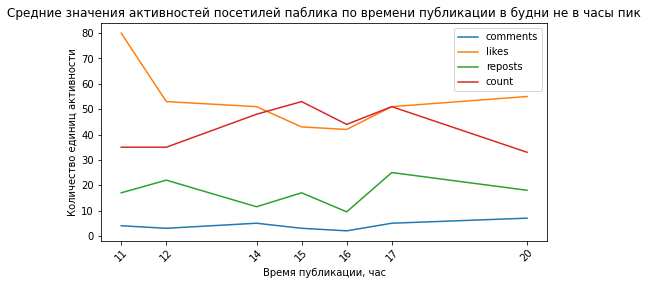

In [ ]:
median_activity = workday_df_not_rush.groupby('only_time').agg('median').reset_index()
length_count_time = workday_df_not_rush.groupby('only_time')['count'].sum().reset_index()
fig, ax = plt.subplots(figsize = (8, 4))
for activity in ['comments', 'likes', 'reposts']: 
    plt.plot(median_activity['only_time'], median_activity[activity], label = activity)
plt.plot(length_count_time['only_time'], length_count_time['count'], label = 'count')
plt.xticks(list(median_activity['only_time'].unique()))
plt.title('Средние значения активностей посетилей паблика по времени публикации в будни не в часы пик')
plt.xlabel('Время публикации, час')
plt.ylabel('Количество единиц активности')
plt.xticks(rotation=45)
plt.legend()

А теперь посмотрим, зависят ли активности от длины текста. Видно, что больше всего текстов у нас примерно до 120 слов. Интересно, что даже на малом количестве текстов, которые больше 150 слов, активность будто не падает, то есть на один текст имеем все равно примерно одинаковое количество активностей пользователей. 
#### Вывод 
<b> Что будто активность хуже всего при длине текстов от 120 до 220 слов. 

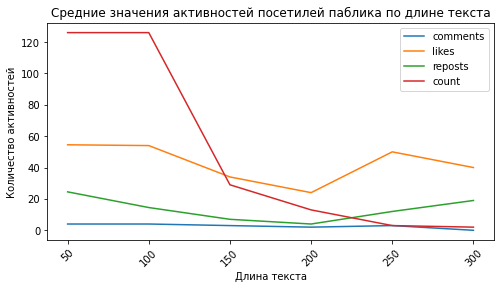

In [ ]:
length_count = workday_df_not_rush.groupby('text_length')['count'].sum().reset_index()
length_grouped = workday_df_not_rush.groupby('text_length').agg('median').reset_index()
fig, ax = plt.subplots(figsize = (8, 4))
for activity in ['comments', 'likes', 'reposts']: 
    plt.plot(length_grouped['text_length'], length_grouped[activity], label = activity)
plt.plot(length_count['text_length'], length_count['count'], label = 'count')
plt.title('Средние значения активностей посетилей паблика по длине текста')
plt.xlabel('Длина текста')
plt.ylabel('Количество активностей')
plt.xticks(rotation=45)
plt.legend()

А теперь посмотрим, что там по вложениям

In [ ]:
attachments = workday_df_not_rush.groupby('attach_types').agg({'likes' : 'median', 'reposts' : 'median', 'attach_count' : 'median', 'count' : 'sum'}).reset_index()
attachments.sort_values('likes')

,attach_types,likes,reposts,attach_count,count
7,videopoll,30.0,13.0,2.0,1
6,video,44.0,10.0,1.0,24
1,linkpoll,48.0,40.0,2.0,1
2,photo,51.0,15.0,4.0,222
4,photopoll,51.0,33.0,5.0,2
0,link,55.0,25.0,1.0,45
5,photovideo,71.0,5.0,6.0,3
3,photodoc,295.0,132.0,8.0,1


In [ ]:
list(workday_df_not_rush.loc[workday_df_not_rush['attach_types'] == 'photodoc', 'text'])

['ОСТОРОЖНО: этот пост может изменить ваше представление о доме мечты.Архитекторы из Москвы Давит и Мэри Джилавян разработали концепцию частного дома Carmine House.Основным цветом авторы выбрали оттенок красного кармина — он отлично выделяется на фоне леса. Дом разделен на две части углом в 45 градусов, чтобы сохранить растущие месте постройки деревья.Со стороны гостиной установлены вращающиеся окна, через которые можно выйти на террасу и пирс. На чердаке установлены окна, трансформирующиеся в мини-балконы.Как видите, многие решения нацелены на то, чтобы хозяева дома ощущали больше гармонии с природой.Как вам проект?#Skillbox_вдохновляет #Skillbox_дизайн']

In [ ]:
list(workday_df_not_rush.loc[workday_df_not_rush['attach_types'] == 'photovideo', 'text'])

['Подводим итоги фестиваля Big Picture!Совместно с креативным агентством POSSIBLE и продакшеном HYPE Production мы в очередной раз провели Big Picture — премию, которая отмечает вклад продакшенов в развитие визуальных коммуникаций.\xa0В этом году во всех номинациях объявлено 60 победителей — полный список лауреатов можно посмотреть на сайте фестиваля, а самых титулованных из них показываем в карточках. Листайте и пишите в комментариях, какая работа впечатлила вас больше всего!Все победители тут: https://bigpicturefestival.ru/winners/\xa0#skillbox_мультимедиа',
 'Что станет с вашим городом в ближайшем будущем? Так звучит тема нашего челленджа для студентов курсов «Рекламная графика», «CG-дженералист» и «Художник компьютерной графики».Мы предложили участникам сфотографировать любую локацию в своем городе и показать, как она будет выглядеть через несколько лет. И вот наши победители!⭐ 1 место — [id1853210|Антон Вереин]⭐ 2 место — [id18661064|Настя Петрова] ⭐ 3 место — Тимур СадвакасовСмот

### выводы 
Пожалуй, стоит обратить внимание на посты с фото, ссылками, а также где есть голосования по карточкам (видео), либо где есть смешанный формат вложений - такие хорошо лайкают, особенно нужно обратить внимание на три поста: 
<br><br>'Подводим итоги фестиваля Big Picture!Совместно с креативным агентством POSSIBLE и продакшеном HYPE Production мы в очередной раз провели Big Picture — премию, которая отмечает вклад продакшенов в развитие визуальных коммуникаций.\xa0В этом году во всех номинациях объявлено 60 победителей — полный список лауреатов можно посмотреть на сайте фестиваля, а самых титулованных из них показываем в карточках. Листайте и пишите в комментариях, какая работа впечатлила вас больше всего!Все победители тут: https://bigpicturefestival.ru/winners/\xa0#skillbox_мультимедиа',
 <br><br>'Что станет с вашим городом в ближайшем будущем? Так звучит тема нашего челленджа для студентов курсов «Рекламная графика», «CG-дженералист» и «Художник компьютерной графики».Мы предложили участникам сфотографировать любую локацию в своем городе и показать, как она будет выглядеть через несколько лет. И вот наши победители!⭐ 1 место — [id1853210|Антон Вереин]⭐ 2 место — [id18661064|Настя Петрова] ⭐ 3 место — Тимур СадвакасовСмотрите в карусели работы победителей и видео того, как они создавались 🤩Вдохновляет? Тогда добро пожаловать в Skillbox 👇🏻Курс «Рекламная графика»: https://vk.cc/bXmagSКурс «Профессия CG-дженералист»: https://vk.cc/bXmal6Курс «Профессия Художник компьютерной графики»: https://vk.cc/atjgEp#Skillbox_дизайн #Студенты_Skillbox',
 <br><br>'Забрендировать пустыню — это что-то новое.Так выглядит креативная рекламная кампания Burberry, бренда люксовых товаров. Монограмму компании нанесли прямо на песчаные дюны в Дубае. Но дюны оказались не единственными полотнами — логотип Burberry появился на воздушных шарах в Монголии и парусных лодках в Китае.Перфоманс посвящен выходу капсульной коллекции TB Summer Monogram, а придумал все эти текстурные надписи художник Натаниэль А. Алапид (@alapide_creator). #Кейс_Skillbox #Skillbox_маркетинг'
<br><br>'Корейское телевидение славится своим самобытным креативом. И вот еще одно подтверждение👇🏻 Недавно в стране запустили Discovery. Хотя международная телесеть обновляла айдентику всего год назад, корейцы решили внести в ее визуальное оформление свою лепту.Дизайн-студия из Сеула SUPER VERY MORE SVM (@superverymore) разработала красочные 3D-объекты, обыгрывающие брендовые элементы. Причем идей наштормили с хорошим запасом — для ребрендинга всех каналов сети.С таким дизайном можно и телик посмотреть! А пока включайте видео и пишите в комментариях свои мысли о проекте студии. #Кейс_Skillbox #Skillbox_маркетинг'
<br> <br>'ОСТОРОЖНО: этот пост может изменить ваше представление о доме мечты.Архитекторы из Москвы Давит и Мэри Джилавян разработали концепцию частного дома Carmine House.Основным цветом авторы выбрали оттенок красного кармина — он отлично выделяется на фоне леса. Дом разделен на две части углом в 45 градусов, чтобы сохранить растущие месте постройки деревья.Со стороны гостиной установлены вращающиеся окна, через которые можно выйти на террасу и пирс. На чердаке установлены окна, трансформирующиеся в мини-балконы.Как видите, многие решения нацелены на то, чтобы хозяева дома ощущали больше гармонии с природой.Как вам проект?#Skillbox_вдохновляет #Skillbox_дизайн'
<br><br> А еще хорошо репостят посты со ссылками и карточками. 

## Подсчеты для часов пик в буднях
Теперь можно все те же самые подсчеты сделать для часов пик.

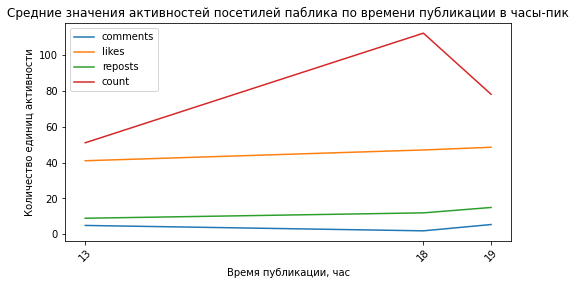

In [ ]:
workday_rush = vkdf.loc[(vkdf['weekday'].isin(list(range(0, 5)))) & (vkdf['only_time'].isin(['13','18','19']))]
median_activity = workday_rush.groupby('only_time').agg('median').reset_index()
length_count_time = workday_rush.groupby('only_time')['count'].sum().reset_index()
fig, ax = plt.subplots(figsize = (8, 4))
for activity in ['comments', 'likes', 'reposts']: 
    plt.plot(median_activity['only_time'], median_activity[activity], label = activity)
plt.plot(length_count_time['only_time'], length_count_time['count'], label = 'count')
plt.xticks(list(median_activity['only_time'].unique()))
plt.title('Средние значения активностей посетилей паблика по времени публикации в часы-пик')
plt.xlabel('Время публикации, час')
plt.ylabel('Количество единиц активности')
plt.xticks(rotation=45)
plt.legend()

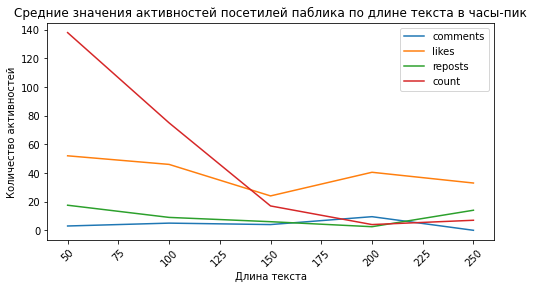

In [ ]:
length_count = workday_rush.groupby('text_length')['count'].sum().reset_index()
length_grouped = workday_rush.groupby('text_length').agg('median').reset_index()
fig, ax = plt.subplots(figsize = (8, 4))
for activity in ['comments', 'likes', 'reposts']: 
    plt.plot(length_grouped['text_length'], length_grouped[activity], label = activity)
plt.plot(length_count['text_length'], length_count['count'], label = 'count')
plt.title('Средние значения активностей посетилей паблика по длине текста в часы-пик')
plt.xlabel('Длина текста')
plt.ylabel('Количество активностей')
plt.xticks(rotation=45)
plt.legend()

#### Выводы 
<br> <b>самая большая активность пользователей - в обед. </b> Потому что количество публикаций вырастает после 18, но при этом количество активностей не меняется, значит, на один пост становится меньше активностей. 
<br> Что касается длины текстов, которые публикуются в часы пик, лучше репостят тексты от 200 слов, лайкают лучше тексты от 200 слов и до 100 слов. При этом большинство текстов - до 150 слов. <b> Вывод: если нужны лайки - золотая середины - до 150 слов. Если репосты - то можно делать тексты подлиннее. 

In [ ]:
attachments = workday_rush.groupby('attach_types').agg({'likes' : 'median', 'reposts' : 'median', 'attach_count' : 'median', 'count' : 'sum'}).reset_index()
attachments.sort_values('likes')

,attach_types,likes,reposts,attach_count,count
0,NoAttach,25.0,8.0,0.0,1
1,album,29.0,4.5,1.0,2
5,poll,31.0,14.0,1.0,1
3,photo,40.5,10.5,1.0,114
2,link,53.5,17.5,1.0,110
4,photopoll,64.0,8.5,3.5,2
6,video,67.0,8.0,1.0,11


В часы пик хорошо лайкают видео, наверное, потому что есть время их посмотреть в обед. <b> Т.е. стоит в обед и часы пик постить с видео. И с карточками (фотопул) и со ссылками </b>
<br> По-прежнему хорошо репостят ссылки. 

## А теперь посмотрим на выходные

In [ ]:
weekend_df = vkdf.loc[(vkdf['weekday'].isin(list(range(5, 7))))]
weekend_df

,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday,topics,text_length,count
0,2021-07-31 18:00:03,"Linux — мощная ОС, которая не уступает Windows...",19.0,22.0,10.0,17531.0,1.0,link,2021-07-01,18,5,[],50,1
1,2021-07-31 11:00:31,Чему только не учат в Скиллбогвартсе: и рисова...,2.0,42.0,23.0,19676.0,6.0,photo,2021-07-01,11,5,[],100,1
12,2021-07-25 15:00:36,"Для тех, кто увлечен программированием, мы уже...",17.0,41.0,40.0,20194.0,8.0,photo,2021-07-01,15,6,['#Skillbox_программирование'],100,1
13,2021-07-25 10:26:23,Аннотация к фильму — наш помощник при выборе к...,4.0,251.0,231.0,23550.0,8.0,photo,2021-07-01,10,6,[],100,1
14,2021-07-24 12:16:58,"Друзья, а не пора ли провести перекличку? Дава...",85.0,280.0,237.0,24876.0,2.0,photopoll,2021-07-01,12,5,[],50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,2020-08-15 12:22:08,До окончания приема документов осталось 2 дня!...,18.0,46.0,3.0,25823.0,1.0,photo,2020-08-01,12,5,['#Skillbox_РАНХиГС'],100,1
645,2020-08-09 11:15:16,YouTube-каналы могут научить многому: рисовать...,2.0,313.0,49.0,33304.0,6.0,photo,2020-08-01,11,6,"['#Skillbox_управление', '#В_закладки_Skillbox']",50,1
646,2020-08-08 11:00:43,"В дизайне много направлений: UX/UI, веб, моуше...",3.0,189.0,19.0,25694.0,6.0,photo,2020-08-01,11,5,"['#Skillbox_дизайн', '#Совет_препода_Skillbox']",100,1
659,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08-01,19,6,"['#Моушн_Skillbox', '#Skillbox_дизайн']",50,1


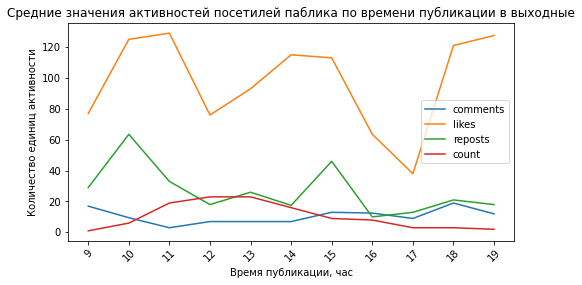

In [ ]:
median_activity = weekend_df.groupby('only_time').agg('median').reset_index()
length_count_time = weekend_df.groupby('only_time')['count'].sum().reset_index()
fig, ax = plt.subplots(figsize = (8, 4))
for activity in ['comments', 'likes', 'reposts']: 
    plt.plot(median_activity['only_time'], median_activity[activity], label = activity)
plt.plot(length_count_time['only_time'], length_count_time['count'], label = 'count')
plt.xticks(list(median_activity['only_time'].unique()))
plt.title('Средние значения активностей посетилей паблика по времени публикации в выходные')
plt.xlabel('Время публикации, час')
plt.ylabel('Количество единиц активности')
plt.xticks(rotation=45)
plt.legend()

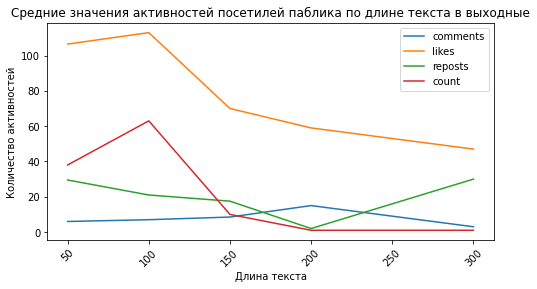

In [ ]:
length_count = weekend_df.groupby('text_length')['count'].sum().reset_index()
length_grouped = weekend_df.groupby('text_length').agg('median').reset_index()
fig, ax = plt.subplots(figsize = (8, 4))
for activity in ['comments', 'likes', 'reposts']: 
    plt.plot(length_grouped['text_length'], length_grouped[activity], label = activity)
plt.plot(length_count['text_length'], length_count['count'], label = 'count')
plt.title('Средние значения активностей посетилей паблика по длине текста в выходные')
plt.xlabel('Длина текста')
plt.ylabel('Количество активностей')
plt.xticks(rotation=45)
plt.legend()

### Выводы 
* интересно, что количество лайков и репостов падает в период наибольной публикационной активности в выходные. Больше всего их в 10, 15 и после 17. 
* тексты до 150 слов набирают больше всего лайков и репостов, а вот чуть-чуть больше комментируют тексты от 150 до 250 слов.
<br> <b> Стоит попробовать изменить время публикации в выходные (сейчас это 10-15 часов, а надо до 10 и после 15) 
<br> И публиковать лучше тексты до 150 слов.    

In [ ]:
attachments1 = weekend_df.groupby('attach_types').agg({'likes' : 'median', 'reposts' : 'median', 'attach_count' : 'median', 'count' : 'sum'}).reset_index()
attachments1.sort_values('likes')

,attach_types,likes,reposts,attach_count,count
0,album,20.0,1.0,1.0,1
1,link,22.0,10.0,1.0,1
4,photopoll,59.0,19.0,2.0,8
6,videodoc,62.0,4.0,4.0,1
5,video,93.0,22.0,1.0,9
3,photodoc,98.0,2.0,6.0,1
2,photo,108.0,23.0,6.0,89
7,videophoto,199.0,11.0,8.0,3


#### Выводы 
<br> Интересно, что при равном количестве (1) больше всего лайков набирают посты с фото и документом каким-то. Хорошо лайкают посты с фото в целом, а также где и видео и фото. Репостят тоже хорошо видео и фото. 
<br> <b> Похоже, на выходных, в отличие от будней, пользователям больше нравятся видео и фото, может быть, потому что в целом мало постят ссылок. 

### А теперь смотрим темы публикаций. 

In [ ]:
vkexp_df

,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday,topics,text_length,count
0,2021-07-31 18:00:03,"Linux — мощная ОС, которая не уступает Windows...",19.0,22.0,10.0,17531.0,1.0,link,2021-07-01,18,5,NaN,28,1
1,2021-07-31 11:00:31,Чему только не учат в Скиллбогвартсе: и рисова...,2.0,42.0,23.0,19676.0,6.0,photo,2021-07-01,11,5,NaN,83,1
2,2021-07-30 18:00:06,Наверняка каждый хотел хоть раз все бросить и ...,1.0,93.0,91.0,13674.0,1.0,link,2021-07-01,18,4,NaN,47,1
3,2021-07-30 17:00:22,На поиски себя и работы по душе можно потратит...,17.0,37.0,59.0,17570.0,1.0,photo,2021-07-01,17,4,NaN,99,1
4,2021-07-30 14:19:25,Обычно благодаря резюме можно получить только ...,4.0,19.0,18.0,14760.0,1.0,photo,2021-07-01,14,4,#skillbox_работа,86,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,2020-08-03 13:19:19,У ведущих новостей появился серьезный конкурен...,42.0,67.0,4.0,20116.0,1.0,video,2020-08-01,13,0,#в_закладки_skillbox,57,1
978,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08-01,19,6,#моушн_skillbox,36,1
979,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08-01,19,6,#skillbox_дизайн,36,1
980,2020-08-01 11:00:47,«В этой жизни я жалею лишь об одном — что джин...,3.0,140.0,6.0,23570.0,6.0,photo,2020-08-01,11,5,#skillbox_дизайн,78,1


Попробую выбрать записи с теми топиками, которые составляют не менее 1% от общего количества записей. Чтобы посмотреть на закономерности и не работать с топиками, на которые очень мало публикаций. 

In [ ]:
topics_sorted = vkexp_df['topics'].value_counts()[vkexp_df['topics'].value_counts(normalize=True) > 0.01]
topics_sorted

#статья_skillbox              76
#Статья_Skillbox              72
#Skillbox_дизайн              61
#skillbox_дизайн              53
#Расписание_Skillbox          50
#skillbox_маркетинг           49
#В_закладки_Skillbox          35
#в_закладки_skillbox          33
#Skillbox_маркетинг           31
#Skillbox_Дизайн              29
#skillbox_программирование    28
#Skillbox_Маркетинг           27
#skillbox_анонс               26
#Лекторий_Skillbox            18
#Skillbox_программирование    16
#skillbox_управление          16
#В_Закладки_Skillbox          14
#Кейс_Skillbox                12
#Skillbox_управление          12
#лекторий_skillbox            12
#Skillbox_Программирование    11
#Skillbox_вдохновляет         10
Name: topics, dtype: int64

Вижу, что часто одна и та же тема, но разница в регистре. Поэтому нужно привести все символы в строковых значениях к одному регистру. Для этого модифицируем общий датасет. Потом оттуда выбираем список тем, на которые есть хотя бы 1% от общего числа публикаций. Выбираем из датасета большого только те записи, которые на эти темы. 

In [ ]:
vkexp_df['topics'] = vkexp_df['topics'].str.lower()
topics_sorted1 = vkexp_df['topics'].value_counts()[vkexp_df['topics'].value_counts(normalize=True) > 0.01]
topics_sorted1
#vk_pop_topics = vkexp_df.loc[vkexp_df['topics'].isin()]

#статья_skillbox                153
#skillbox_дизайн                143
#skillbox_маркетинг             107
#в_закладки_skillbox             82
#skillbox_программирование       55
#расписание_skillbox             50
#skillbox_управление             32
#лекторий_skillbox               30
#skillbox_анонс                  26
#skillbox_вдохновляет            15
#skillbox                        15
#высшее_образование_skillbox     14
#совет_препода_skillbox          12
#кейс_skillbox                   12
Name: topics, dtype: int64

In [ ]:
top_topics = list(topics_sorted1.index)
vk_pop_topics = vkexp_df.loc[vkexp_df['topics'].isin(top_topics)]
vk_pop_topics

,date,text,comments,likes,reposts,views,attach_count,attach_types,only_date,only_time,weekday,topics,text_length,count
8,2021-07-28 13:00:01,"Хороший пиарщик знает, что «сарафанными» должн...",20.0,40.0,17.0,14097.0,6.0,photo,2021-07-01,13,2,#skillbox_маркетинг,118,1
9,2021-07-27 17:37:56,"Многие думают, что профессия бухгалтера — это ...",14.0,16.0,9.0,67597.0,1.0,link,2021-07-01,17,1,#skillbox_управление,91,1
10,2021-07-27 14:16:57,Лучше вкусного кофе по утрам может быть только...,24.0,27.0,9.0,17401.0,1.0,video,2021-07-01,14,1,#skillbox_дизайн,97,1
11,2021-07-26 14:44:14,А вот и расписание наших бесплатных вебинаров!...,20.0,57.0,44.0,20823.0,3.0,photo,2021-07-01,14,0,#расписание_skillbox,43,1
12,2021-07-25 15:00:36,"Для тех, кто увлечен программированием, мы уже...",17.0,41.0,40.0,20194.0,8.0,photo,2021-07-01,15,6,#skillbox_программирование,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2020-08-03 13:19:19,У ведущих новостей появился серьезный конкурен...,42.0,67.0,4.0,20116.0,1.0,video,2020-08-01,13,0,#skillbox_программирование,57,1
977,2020-08-03 13:19:19,У ведущих новостей появился серьезный конкурен...,42.0,67.0,4.0,20116.0,1.0,video,2020-08-01,13,0,#в_закладки_skillbox,57,1
979,2020-08-02 19:38:27,Смотреть со звуком!Моушен-дизайнер Владислав С...,10.0,154.0,22.0,22956.0,1.0,video,2020-08-01,19,6,#skillbox_дизайн,36,1
980,2020-08-01 11:00:47,«В этой жизни я жалею лишь об одном — что джин...,3.0,140.0,6.0,23570.0,6.0,photo,2020-08-01,11,5,#skillbox_дизайн,78,1


##### А теперь смотрим, какая активность пользователей по разным тематикам. 

In [ ]:
vk_pop_topics.groupby('topics').agg({'likes' : 'median', 'reposts' : 'median', 'attach_count' : 'median', 'count' : 'sum'}).reset_index().sort_values(by='likes', ascending=False)

,topics,likes,reposts,attach_count,count
9,#кейс_skillbox,152.5,9.0,2.5,12
7,#в_закладки_skillbox,116.5,42.5,8.0,82
2,#skillbox_вдохновляет,103.0,20.0,6.0,15
12,#совет_препода_skillbox,82.0,20.0,8.0,12
3,#skillbox_дизайн,71.0,16.0,1.0,143
6,#skillbox_управление,66.0,29.5,6.0,32
4,#skillbox_маркетинг,58.0,17.0,1.0,107
5,#skillbox_программирование,56.0,18.0,1.0,55
13,#статья_skillbox,54.0,19.0,1.0,153
0,#skillbox,49.0,14.0,1.0,15


#### Выводы 
<br> Кажется, что топики: кейс, в закладки, вдохновляет - хорошо лайкают, а топик "в закладки" еще и хорошо репостят. На них и нужно обратить внимание. В целом. 
<br> <br>а теперь еще можно ради интереса посмотреть это же на выходных и буднях. Вдруг есть разница? 

In [ ]:
vk_pop_topics_weekday = vk_pop_topics.loc[(vk_pop_topics['weekday'].isin(list(range(0, 5))))]
vk_pop_topics_weekday.groupby('topics').agg({'likes' : 'median', 'reposts' : 'median', 'attach_count' : 'median', 'count' : 'sum'}).reset_index().sort_values(by='likes', ascending=False)

,topics,likes,reposts,attach_count,count
9,#кейс_skillbox,151.5,7.5,2.5,10
7,#в_закладки_skillbox,109.5,38.0,8.0,54
2,#skillbox_вдохновляет,103.0,28.0,7.0,9
3,#skillbox_дизайн,65.5,14.0,1.0,116
6,#skillbox_управление,62.0,28.0,6.0,27
5,#skillbox_программирование,55.0,18.0,1.0,45
4,#skillbox_маркетинг,54.0,15.0,1.0,93
12,#совет_препода_skillbox,54.0,28.0,8.0,9
13,#статья_skillbox,54.0,19.0,1.0,153
0,#skillbox,40.0,12.0,1.0,12


In [ ]:
vk_pop_topics_weekend = vk_pop_topics.loc[(vk_pop_topics['weekday'].isin(list(range(5, 7))))]
vk_pop_topics_weekend.groupby('topics').agg({'likes' : 'median', 'reposts' : 'median', 'attach_count' : 'median', 'count' : 'sum'}).reset_index().sort_values(by='likes', ascending=False)

,topics,likes,reposts,attach_count,count
7,#кейс_skillbox,161.5,108.0,4.5,2
9,#совет_препода_skillbox,151.0,16.0,6.0,3
5,#skillbox_управление,139.0,49.0,6.0,5
2,#skillbox_дизайн,129.0,21.0,6.0,27
6,#в_закладки_skillbox,124.0,47.0,7.0,28
3,#skillbox_маркетинг,116.0,32.5,6.5,14
1,#skillbox_вдохновляет,99.5,18.0,6.0,6
0,#skillbox,79.0,23.0,7.0,3
4,#skillbox_программирование,77.5,27.0,6.0,10
8,#лекторий_skillbox,42.0,22.0,1.0,3


#### Интерпретация 
<br> Пиковые активности по публикациям вижу в 13-14 и 18-19 часов в будни. В выходные публикационная активность самая высокая с 11 до 15, но интересно, что в этот период люди меньше лайкают, репостят или комментируют посты. В целом, в выходные пользователи проявляют больше активностей на один пост, чем в будни. 
<br> <br> Т.е. следует больше публиковать в выходные до 11 и после 15. 
<br> В будни,  если нужно больше лайков, стоит побольше публиковать в 11. А для репостов - в 17. 
<br><br>РЕКОМЕНДАЦИИ НЕ ДЛЯ ЧАСОВ ПИК В БУДНИ
<br><br>Также в будни активностей пользователей меньше всего при длине текста от 120 до 220 слов.
<br> <br> Пожалуй, стоит обратить внимание на посты с фото, ссылками, а также где есть голосования по карточкам (видео), либо где есть смешанный формат вложений - такие хорошо лайкают, особенно нужно обратить внимание на посты и, может быть, делать похожие:

<br> 'Подводим итоги фестиваля Big Picture!Совместно с креативным агентством POSSIBLE и продакшеном HYPE Production мы в очередной раз провели Big Picture — премию, которая отмечает вклад продакшенов в развитие визуальных коммуникаций.\xa0В этом году во всех номинациях объявлено 60 победителей — полный список лауреатов можно посмотреть на сайте фестиваля, а самых титулованных из них показываем в карточках. Листайте и пишите в комментариях, какая работа впечатлила вас больше всего!Все победители тут: https://bigpicturefestival.ru/winners/\xa0#skillbox_мультимедиа',

<br> 'Что станет с вашим городом в ближайшем будущем? Так звучит тема нашего челленджа для студентов курсов «Рекламная графика», «CG-дженералист» и «Художник компьютерной графики».Мы предложили участникам сфотографировать любую локацию в своем городе и показать, как она будет выглядеть через несколько лет. И вот наши победители!⭐ 1 место — [id1853210|Антон Вереин]⭐ 2 место — [id18661064|Настя Петрова] ⭐ 3 место — Тимур СадвакасовСмотрите в карусели работы победителей и видео того, как они создавались 🤩Вдохновляет? Тогда добро пожаловать в Skillbox 👇🏻Курс «Рекламная графика»: https://vk.cc/bXmagSКурс «Профессия CG-дженералист»: https://vk.cc/bXmal6Курс «Профессия Художник компьютерной графики»: https://vk.cc/atjgEp#Skillbox_дизайн #Студенты_Skillbox',

<br> 'Забрендировать пустыню — это что-то новое.Так выглядит креативная рекламная кампания Burberry, бренда люксовых товаров. Монограмму компании нанесли прямо на песчаные дюны в Дубае. Но дюны оказались не единственными полотнами — логотип Burberry появился на воздушных шарах в Монголии и парусных лодках в Китае.Перфоманс посвящен выходу капсульной коллекции TB Summer Monogram, а придумал все эти текстурные надписи художник Натаниэль А. Алапид (@alapide_creator). #Кейс_Skillbox #Skillbox_маркетинг'

<br>'Корейское телевидение славится своим самобытным креативом. И вот еще одно подтверждение👇🏻 Недавно в стране запустили Discovery. Хотя международная телесеть обновляла айдентику всего год назад, корейцы решили внести в ее визуальное оформление свою лепту.Дизайн-студия из Сеула SUPER VERY MORE SVM (@superverymore) разработала красочные 3D-объекты, обыгрывающие брендовые элементы. Причем идей наштормили с хорошим запасом — для ребрендинга всех каналов сети.С таким дизайном можно и телик посмотреть! А пока включайте видео и пишите в комментариях свои мысли о проекте студии. #Кейс_Skillbox #Skillbox_маркетинг'

'ОСТОРОЖНО: этот пост может изменить ваше представление о доме мечты.Архитекторы из Москвы Давит и Мэри Джилавян разработали концепцию частного дома Carmine House.Основным цветом авторы выбрали оттенок красного кармина — он отлично выделяется на фоне леса. Дом разделен на две части углом в 45 градусов, чтобы сохранить растущие месте постройки деревья.Со стороны гостиной установлены вращающиеся окна, через которые можно выйти на террасу и пирс. На чердаке установлены окна, трансформирующиеся в мини-балконы.Как видите, многие решения нацелены на то, чтобы хозяева дома ощущали больше гармонии с природой.Как вам проект?#Skillbox_вдохновляет #Skillbox_дизайн'

А еще хорошо репостят посты со ссылками и карточками. 

РЕКОМЕНДАЦИИ ДЛЯ ЧАСОВ ПИК В БУДНЯХ

Самая большая активность пользователей - в обед. Потому что количество публикаций вырастает после 18, но при этом количество активностей не меняется, значит, на один пост становится меньше активностей.
Что касается длины текстов, которые публикуются в часы пик, лучше репостят тексты от 200 слов, лайкают лучше тексты от 200 слов и до 100 слов. При этом большинство текстов - до 150 слов. Вывод: если нужны лайки - золотая середины - до 150 слов. Если репосты - то можно делать тексты подлиннее.

В часы пик хорошо лайкают видео, наверное, потому что есть время их посмотреть в обед. Т.е. стоит в обед и часы пик постить с видео. И с карточками (фотопул) и со ссылками
По-прежнему хорошо репостят ссылки.

РЕКОМЕНДАЦИИ В ВЫХОДНЫЕ 

Стоит попробовать изменить время публикации в выходные (сейчас это 10-15 часов, а надо до 10 и после 15)
И публиковать лучше тексты до 150 слов.

Интересно, что при равном количестве (1) больше всего лайков набирают посты с фото и документом каким-то. Хорошо лайкают посты с фото в целом, а также где и видео и фото. Репостят тоже хорошо видео и фото.
Похоже, на выходных, в отличие от будней, пользователям больше нравятся видео и фото, может быть, потому что в целом мало постят ссылок.

ПО ТЕМАМ

Кажется, что топики: кейс, в закладки, вдохновляет - хорошо лайкают, а топик "в закладки" еще и хорошо репостят. На них и нужно обратить внимание.
